In [18]:
#import libraries
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd


In [19]:
data = pd.read_csv('creditcard.csv')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [ ]:
data.head()

In [3]:
print(data.shape)

(284807, 31)


In [4]:
data.isnull().values.any()

False

In [21]:
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0]

In [22]:
print(fraud.shape,valid.shape)

(492, 31) (284315, 31)


In [24]:
# dividing the X and the Y from the dataset 
#X = data.drop(['Class'], axis = 1)
X = data[['Time','Amount']]
Y = data["Class"] 
print(X.shape) 
print(Y.shape) 
# getting just the values for the sake of processing  
# (its a numpy array with no columns) 
xData = X.values 
yData = Y.values 

(284807, 2)
(284807,)


In [25]:

# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split( 
        xData, yData, test_size = 0.2, random_state = 40)

In [26]:
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
# predictions 
yPred = rfc.predict(xTest) 

In [27]:
from sklearn.metrics import accuracy_score  
acc = accuracy_score(yTest, yPred) 
print("The accuracy of Render forest is {}".format(acc)) 


The accuracy of Render forest is 0.9980513324672589


In [28]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()
gnb.fit(xTrain, yTrain)
yPred=gnb.predict(xTest)
acc = accuracy_score(yTest, yPred) 
print("The accuracy of Naive Bayes is {}".format(acc)) 


The accuracy of Naive Bayes is 0.9982971103542713


In [29]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(xTrain, yTrain)
yPred=dummy.predict(xTest)
acc = accuracy_score(yTest, yPred) 
print("The accuracy of Dummy Classifier is {}".format(acc)) 

The accuracy of Dummy Classifier is 0.9967171096520487


/home/diwas/.conda/envs/tf/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [30]:
 
from sklearn.svm import SVC
svm = SVC()
svm.fit(xTrain, yTrain)
yPred=svm.predict(xTest)
acc = accuracy_score(yTest, yPred) 
print("The accuracy of SVM is {}".format(acc)) 

The accuracy of SVM is 0.9982971103542713


In [31]:
print(fraud.shape)

(492, 31)


In [32]:
# Lets shuffle the data before creating the subsamples

data1 = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_data1 = data1.loc[data1['Class'] == 1]
non_fraud_data1 = data1.loc[data1['Class'] == 0][:492]

normal_distributed_data1 = pd.concat([fraud_data1, non_fraud_data1])

# Shuffle dataframe rows
new_data1 = normal_distributed_data1.sample(frac=1, random_state=42)

new_data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
195333,131003.0,0.110005,0.804221,-0.655580,-0.757123,1.080228,-0.244358,0.763154,0.164066,-0.020548,...,-0.337615,-0.960051,0.061174,-0.059050,-0.430303,0.133619,0.203078,0.066234,11.98,0
263080,160791.0,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,0.128904,...,0.163739,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,1.00,1
26713,34216.0,1.228822,-0.963173,1.287071,-0.396690,-1.844788,-0.191202,-1.237298,0.217799,-0.160581,...,-0.414214,-0.660434,0.151229,0.538553,-0.091503,0.931367,-0.019130,0.014932,26.99,0
154234,100924.0,-23.984747,16.697832,-22.209875,9.584969,-16.230439,2.596333,-33.239328,-21.560039,-10.842526,...,-12.615023,5.774087,2.750221,0.513411,-1.608804,-0.459624,-4.626127,-0.334561,1.00,1
261925,160243.0,-2.783865,1.596824,-2.084844,2.512986,-1.446749,-0.828496,-0.732262,-0.203329,-0.347046,...,0.203563,0.293268,0.199568,0.146868,0.163602,-0.624085,-1.333100,0.428634,156.00,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


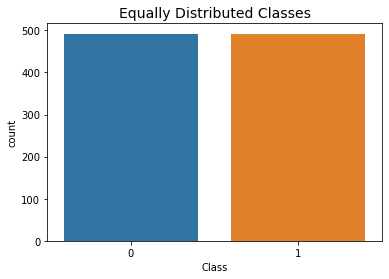

In [33]:
print('Distribution of the Classes in the subsample dataset')
print(new_data1['Class'].value_counts()/len(new_data1))


import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot('Class', data=new_data1)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [34]:
# dividing the X and the Y from the dataset 
#X = data.drop(['Class'], axis = 1)
X = new_data1[['Time','Amount']]
Y = new_data1["Class"] 
print(X.shape) 
print(Y.shape) 
# getting just the values for the sake of processing  
# (its a numpy array with no columns) 
xData = X.values 
yData = Y.values 

(984, 2)
(984,)


In [44]:

# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split( 
        xData, yData, test_size = 0.2, random_state = 40)

In [45]:
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
# predictions 
yPred = rfc.predict(xTest) 

In [46]:
from sklearn.metrics import accuracy_score  
acc = accuracy_score(yTest, yPred) 
print("The accuracy of Render forest is {}".format(acc)) 


The accuracy of Render forest is 0.7766497461928934
